In [3]:
!git clone https://github.com/mayankified/wce-dataset.git

Cloning into 'wce-dataset'...
remote: Enumerating objects: 12384, done.
remote: Total 12384 (delta 0), reused 0 (delta 0), pack-reused 12384 (from 2)
Receiving objects: 100% (12384/12384), 288.23 MiB | 48.30 MiB/s, done.
Resolving deltas: 100% (1294/1294), done.
Updating files: 100% (15815/15815), done.


In [4]:
import torch
import pathlib
import PIL
import sklearn

from torch.utils.data import Dataset
from pathlib import Path
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
path = "/kaggle/working/wce-dataset/WCEBleedGen (updated)"
data_dir = Path(path)

In [6]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f"There are {len(dirname)} directories and {len(filename)} files in {dirpath}")

In [7]:
bleeding_data_set_dir = data_dir / "bleeding/Images"
bleeding_data_set_dir

PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images')

In [8]:
non_bleeding_data_set_dir = data_dir / "non-bleeding/images"
non_bleeding_data_set_dir

PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images')

In [9]:
bleeding_images = list(bleeding_data_set_dir.glob("*.png"))
len(bleeding_images)

1309

In [10]:
non_bleeding_images = list(non_bleeding_data_set_dir.glob("*.png"))
len(non_bleeding_images)

1309

In [11]:
non_bleeding_data_set_dir.parent.stem

'non-bleeding'

In [12]:
bleeding_label = [bleeding_data_set_dir.parent.stem]*len(bleeding_images)
bleeding_train, bleeding_test, label_train, label_test = train_test_split(bleeding_images, bleeding_label, test_size=0.2, random_state=42)

In [13]:
bleeding_train[:10], label_train[:10]

([PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (954).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (924).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (143).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (6).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (1175).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (822).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (85).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (117).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (1202).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (929).png')],
 ['bleeding',
  'bleeding',
  

In [14]:
non_bleeding_label = [non_bleeding_data_set_dir.parent.stem]*len(non_bleeding_images)
non_bleeding_train, non_bleeding_test, label_train, label_test = train_test_split(non_bleeding_images, non_bleeding_label, test_size=0.2, random_state=42)

In [15]:
non_bleeding_train[:10], label_train[:10]

([PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (954).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (924).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (143).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (6).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (1175).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (822).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (85).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (117).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (1202).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (929

In [16]:
label_split = {}
label_split['train'] = bleeding_train + non_bleeding_train
label_split['test'] = bleeding_test + non_bleeding_test

In [17]:
label_split["train"][:5],label_split['train'][-5:]

([PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (954).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (924).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (143).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (6).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (1175).png')],
 [PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (507).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (133).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (427).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (148).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (904).png')])

In [18]:
label_split["test"][:5],label_split['test'][-5:]

([PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (585).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (1188).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (395).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (436).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (286).png')],
 [PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (491).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (1147).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (430).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (406).png'),
  PosixPath('/kaggle/working/wce-dataset/WCEBleedGen (updated)/non-bleeding/images/img- (201).png')])

In [19]:
list(label_split["test"][0].parents)[0].parent.stem

'bleeding'

In [20]:
# Create target directory path
target_dir_name = f"/kaggle/working/DATA"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '/kaggle/working/DATA'


In [21]:
import shutil

for image_split in label_split.keys():
    for image_path in label_split[str(image_split)]:
        dest_dir = target_dir / image_split / list(image_path.parents)[0].parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (954).png to /kaggle/working/DATA/train/bleeding/img- (954).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (924).png to /kaggle/working/DATA/train/bleeding/img- (924).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (143).png to /kaggle/working/DATA/train/bleeding/img- (143).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (6).png to /kaggle/working/DATA/train/bleeding/img- (6).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (1175).png to /kaggle/working/DATA/train/bleeding/img- (1175).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img- (822).png to /kaggle/working/DATA/train/bleeding/img- (822).png...
[INFO] Copying /kaggle/working/wce-dataset/WCEBleedGen (updated)/bleeding/Images/img

In [22]:
walk_through_dir(target_dir)

There are 2 directories and 0 files in /kaggle/working/DATA
There are 2 directories and 0 files in /kaggle/working/DATA/test
There are 0 directories and 262 files in /kaggle/working/DATA/test/bleeding
There are 0 directories and 262 files in /kaggle/working/DATA/test/non-bleeding
There are 2 directories and 0 files in /kaggle/working/DATA/train
There are 0 directories and 1047 files in /kaggle/working/DATA/train/bleeding
There are 0 directories and 1047 files in /kaggle/working/DATA/train/non-bleeding


In [23]:
import torch
import torchvision
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, ops
from pathlib import Path
from typing import List, Dict, Tuple
from collections import defaultdict
from matplotlib import patches, text, patheffects
from sklearn.metrics import classification_report
from PIL import Image

try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
     

In [24]:
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [25]:
train_transform = transforms.Compose([
    transforms.Resize(size=(100,100)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0,0,0],std=[1,1,1],inplace=True)
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(100,100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0,0,0],std=[1,1,1],inplace=True)
])
     


In [26]:

data_dir = Path("/kaggle/working/DATA")

train_dir = data_dir / "train"
test_dir = data_dir / "test"

train_dataset = datasets.ImageFolder(
    root = train_dir,
    transform=train_transform
)

test_dataset = datasets.ImageFolder(
    root=test_dir,
    transform=test_transforms
)

train_dataset, test_dataset
     

(Dataset ImageFolder
     Number of datapoints: 2094
     Root location: /kaggle/working/DATA/train
     StandardTransform
 Transform: Compose(
                Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
                Normalize(mean=[0, 0, 0], std=[1, 1, 1])
            ),
 Dataset ImageFolder
     Number of datapoints: 524
     Root location: /kaggle/working/DATA/test
     StandardTransform
 Transform: Compose(
                Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0, 0, 0], std=[1, 1, 1])
            ))

In [27]:
train_dataset.class_to_idx

{'bleeding': 0, 'non-bleeding': 1}

In [28]:
train_img, train_label = train_dataset[0][0], train_dataset[0][1]
print(f"Image tensor:\n{train_img}")
print(f"Image shape: {train_img.shape}")
print(f"Image datatype: {train_img.dtype}")
print(f"Image label: {train_label}")
print(f"Label datatype: {type(train_label)}")

Image tensor:
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0078, 0.0000, 0.0078,  ..., 0.4745, 0.2667, 0.0275],
         [0.0039, 0.0000, 0.0039,  ..., 0.3529, 0.0549, 0.0157],
         [0.0000, 0.0000, 0.0078,  ..., 0.1098, 0.0157, 0.0118]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.3608, 0.2039, 0.0157],
         [0.0000, 0.0000, 0.0039,  ..., 0.2706, 0.0353, 0.0039],
         [0.0000, 0.0000, 0.0039,  ..., 0.0784, 0.0039, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.00

In [29]:
class_name = train_dataset.classes
class_name
     

['bleeding', 'non-bleeding']

(-0.5, 99.5, 99.5, -0.5)

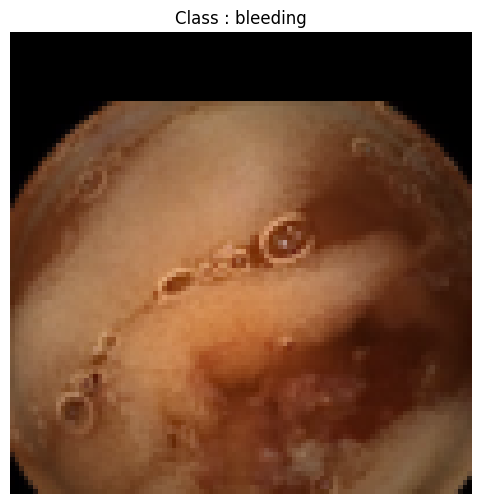

In [30]:
import matplotlib.pyplot as plt

permute_img = train_img.permute(1,2,0)
fig = plt.figure(figsize=(6,6))

plt.imshow(permute_img)
plt.title(f"Class : {class_name[train_label]}")
plt.axis(False)

In [32]:
import os

BATCH_SIZE = 128
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_dataset,
                              shuffle=True,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_dataset,
                             shuffle=False,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS)


In [33]:
train_dataloader, test_dataloader
     

(<torch.utils.data.dataloader.DataLoader at 0x799ae46fa5f0>,
 <torch.utils.data.dataloader.DataLoader at 0x799ae46fa020>)

In [34]:
batch_img, batch_label = next(iter(train_dataloader))
batch_img.shape, batch_label.shape
     


(torch.Size([128, 3, 100, 100]), torch.Size([128]))

In [35]:
batch_img


tensor([[[[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [36]:
batch_label

tensor([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1])

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [38]:
pip install efficientnet_pytorch


  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=3d9f9ba7c100edaa63c76655eefd8034ea1ac8491e41ab9a16fe710322c113cf
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.


In [40]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import torch.nn as nn

# Load EfficientNet with pretrained weights
weights = EfficientNet_B0_Weights.DEFAULT
model = efficientnet_b0(weights=weights)

# Freeze all layers (optional - for feature extraction only)
for param in model.parameters():
    param.requires_grad = False

# Replace final classification layer for binary classification
model.classifier[1] = nn.Linear(
    in_features=model.classifier[1].in_features,
    out_features=2
)

# Move model to device
model = model.to(device)


In [41]:
summary(model)

Layer (type:depth-idx)                                  Param #
EfficientNet                                            --
├─Sequential: 1-1                                       --
│    └─Conv2dNormActivation: 2-1                        --
│    │    └─Conv2d: 3-1                                 (864)
│    │    └─BatchNorm2d: 3-2                            (64)
│    │    └─SiLU: 3-3                                   --
│    └─Sequential: 2-2                                  --
│    │    └─MBConv: 3-4                                 (1,448)
│    └─Sequential: 2-3                                  --
│    │    └─MBConv: 3-5                                 (6,004)
│    │    └─MBConv: 3-6                                 (10,710)
│    └─Sequential: 2-4                                  --
│    │    └─MBConv: 3-7                                 (15,350)
│    │    └─MBConv: 3-8                                 (31,290)
│    └─Sequential: 2-5                                  --
│    │    └─MBConv

In [42]:
from torch.optim import Adam

# Only train the final layer
optimiser = Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()


In [43]:
# Unfreeze last few feature blocks
for name, param in model.named_parameters():
    if "features.6" in name or "features.7" in name or "classifier" in name:
        param.requires_grad = True


In [48]:
def train_step(train_dataloader : torch.utils.data.DataLoader,
          model : nn.Module,
          loss_fn : nn.Module,
          optimiser : torch.optim.Optimizer,
          ):

  # Put the model in training mode
  model.train()

  # metrics to calculate
  training_loss = 0
  training_accuracy = 0

  for batch, (X,y) in enumerate(train_dataloader):

    # put data on correct device
    X = X.to(device)
    y = y.to(device)

    # make a prediction
    y_pred = model(X) #Logits
    y_pred_label = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

    # Calculate loss and accuracy
    loss = loss_fn(y_pred, y)
    training_loss += loss
    training_accuracy += (y==y_pred_label).sum().item()/len(y)

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

  # Calculate training loss and accuracy per batch
  training_loss/=len(train_dataloader)
  training_accuracy/=len(train_dataloader)

  return training_loss.item(), training_accuracy
     

In [49]:
def test_step(test_dataloader : torch.utils.data.DataLoader,
          model : nn.Module,
          loss_fn : nn.Module,
          ):

  #Put the model in evaluation mode
  model.eval()

  test_loss = 0
  test_accuracy = 0

  with torch.inference_mode():

    for batch, (X,y) in enumerate(test_dataloader):

      # Put the data on right device
      X = X.to(device)
      y = y.to(device)

      test_pred = model(X) # Logits
      test_pred_label = torch.argmax(torch.softmax(test_pred, dim=1), dim=1)

      test_loss += loss_fn(test_pred, y)
      test_accuracy += (test_pred_label==y).sum().item()/len(y)

    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)

  return test_loss.item(), test_accuracy
    

In [50]:
from tqdm.auto import tqdm
from collections import defaultdict

def train(model : nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader,
          loss_fn : nn.Module,
          optimiser : torch.optim.Optimizer,
          epochs : int = 5
          ):

  result = defaultdict(list)

  for epoch in tqdm(range(epochs)):

    # train and test step
    train_loss, train_acc = train_step(train_dataloader=train_dataloader,
                                       model = model,
                                       loss_fn = loss_fn,
                                       optimiser = optimiser)
    test_loss, test_acc = test_step(test_dataloader=test_dataloader,
                                    model = model,
                                    loss_fn = loss_fn)

    # Store the results
    result['train_loss'].append(train_loss)
    result['test_loss'].append(test_loss)
    result['train_accuracy'].append(train_acc)
    result['test_accuracy'].append(test_acc)

    # scheduler.step()

    # print what's happening
    print(f"Epoch : {epoch} | training loss = {train_loss} | test loss = {test_loss} | training accuracy = {train_acc} | test accuracy = {test_acc}")

  return result

In [51]:
from timeit import default_timer as timer

epochs = 50

start_time = timer()
result = train(model = model,
               train_dataloader = train_dataloader,
               test_dataloader = test_dataloader,
               loss_fn = loss_fn,
               optimiser = optimiser,
               epochs = epochs
               )

end_time = timer()
print(f"Total time taken for training : {end_time - start_time} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch : 0 | training loss = 0.6481103897094727 | test loss = 0.5707059502601624 | training accuracy = 0.6277773337595908 | test accuracy = 0.7760416666666667
Epoch : 1 | training loss = 0.6082139611244202 | test loss = 0.5312989950180054 | training accuracy = 0.7004275895140665 | test accuracy = 0.8026041666666666
Epoch : 2 | training loss = 0.574385941028595 | test loss = 0.4987281262874603 | training accuracy = 0.7411884590792839 | test accuracy = 0.8380208333333334
Epoch : 3 | training loss = 0.5419126749038696 | test loss = 0.46545615792274475 | training accuracy = 0.7699408567774936 | test accuracy = 0.8614583333333334
Epoch : 4 | training loss = 0.5195043683052063 | test loss = 0.43957677483558655 | training accuracy = 0.7980738491048593 | test accuracy = 0.8677083333333334
Epoch : 5 | training loss = 0.48241761326789856 | test loss = 0.41512542963027954 | training accuracy = 0.8222906010230179 | test accuracy = 0.8786458333333333
Epoch : 6 | training loss = 0.4720342755317688 | 

In [52]:
result

defaultdict(list,
            {'train_loss': [0.6481103897094727,
              0.6082139611244202,
              0.574385941028595,
              0.5419126749038696,
              0.5195043683052063,
              0.48241761326789856,
              0.4720342755317688,
              0.4565260112285614,
              0.44524794816970825,
              0.4282049536705017,
              0.429349422454834,
              0.415643572807312,
              0.40879392623901367,
              0.3929445743560791,
              0.3890247941017151,
              0.38644081354141235,
              0.36611080169677734,
              0.37419527769088745,
              0.37348371744155884,
              0.3709094822406769,
              0.35343217849731445,
              0.3472679853439331,
              0.35465165972709656,
              0.34613311290740967,
              0.336853563785553,
              0.3412255048751831,
              0.33880969882011414,
              0.32587361335754395,
        

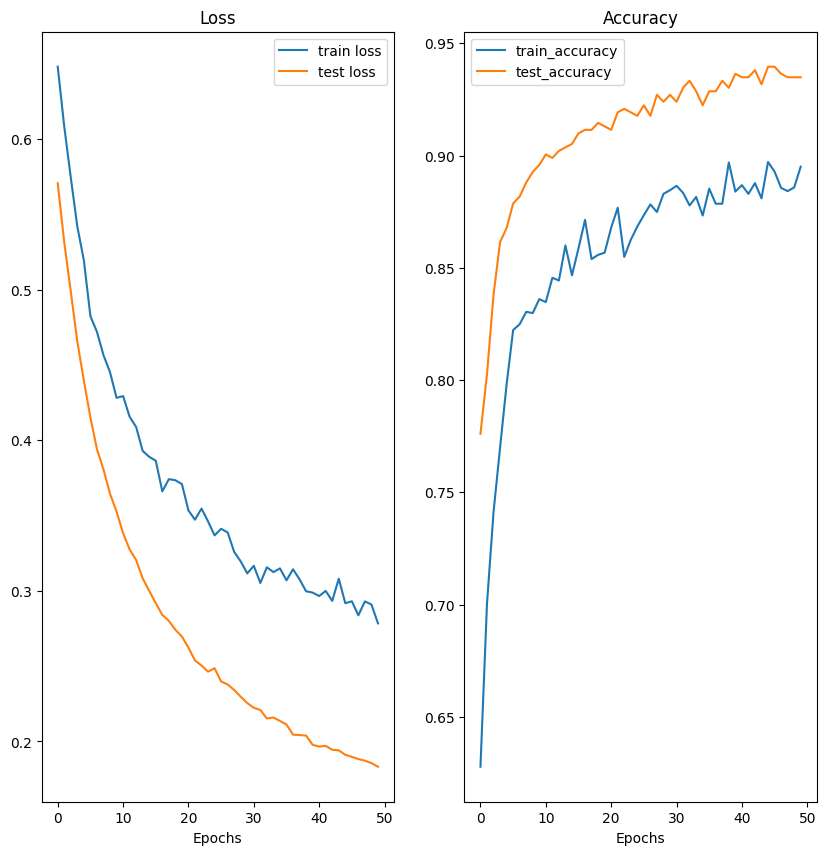

In [53]:
    import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(epochs), result['train_loss'], label='train loss')
plt.plot(range(epochs), result['test_loss'], label='test loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), result['train_accuracy'], label='train_accuracy')
plt.plot(range(epochs), result['test_accuracy'], label='test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();


In [54]:
torch.save(model.state_dict(), "/kaggle/working/Model")

In [55]:
model.load_state_dict(torch.load("/kaggle/working/Model", weights_only=True))


<All keys matched successfully>

In [56]:
y_pred = []
y_true = []

model.eval()
with torch.inference_mode():

  for images, labels in test_dataset:

    y_pred_logits = model(images.unsqueeze(dim=0).to(device))
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)

    y_pred.append(y_pred_labels.item())
    y_true.append(labels)


print(classification_report(y_pred = y_pred, y_true = y_true))
     

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       262
           1       0.90      0.99      0.94       262

    accuracy                           0.94       524
   macro avg       0.94      0.94      0.94       524
weighted avg       0.94      0.94      0.94       524



In [ ]:
validation_test_1_path = Path("/kaggle/working/wce-dataset/WCEBleedGen_Test/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1")
validation_test_1_images = list(validation_test_1_path.glob("*.png"))

len(validation_test_1_images)
     

In [ ]:
idx_to_class = {}
for key, val in train_dataset.class_to_idx.items():

  idx_to_class[val] = key

idx_to_class

In [ ]:
validation_transform = transforms.Compose([transforms.Resize(size=(100,100)),
                                           transforms.ToTensor()])

test_1_results = defaultdict(list)

model.eval()
with torch.inference_mode():
  for image in validation_test_1_images:

    test_1_results['Image name'].append(image.stem)

    img = Image.open(image)
    transformed_img = validation_transform(img).unsqueeze(dim=0).to(device)

    pred_label = torch.argmax(torch.softmax(model(transformed_img), dim=1), dim=1).item()
    test_1_results['Predicted Class label'].append(pred_label)

test_1_results_df = pd.DataFrame.from_dict(test_1_results)
test_1_results_df['Predicted Class label'] = test_1_results_df['Predicted Class label'].map(idx_to_class)
test_1_results_df

In [ ]:
validation_test_2_path = Path("/kaggle/working/wce-dataset/WCEBleedGen_Test/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 2")
validation_test_2_images = list(validation_test_2_path.glob("*.png"))

len(validation_test_2_images)
     

In [ ]:

test_2_results = defaultdict(list)

model.eval()
with torch.inference_mode():
  for image in validation_test_2_images:

    test_2_results['Image name'].append(image.stem)

    img = Image.open(image)
    transformed_img = validation_transform(img).unsqueeze(dim=0).to(device)

    pred_label = torch.argmax(torch.softmax(model(transformed_img), dim=1), dim=1).item()
    test_2_results['Predicted Class label'].append(pred_label)

test_2_results_df = pd.DataFrame.from_dict(test_2_results)
test_2_results_df['Predicted Class label'] = test_2_results_df['Predicted Class label'].map(idx_to_class)
test_2_results_df
     

In [ ]:
test_1_results_df.to_excel(excel_writer="/kaggle/working/Test 1 Dataset.xlsx")
test_2_results_df.to_excel(excel_writer="/kaggle/working/Test 2 Dataset.xlsx")
     